In [1]:
!nvidia-smi

Thu May 11 15:00:53 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install --upgrade git+https://github.com/huggingface/diffusers.git transformers accelerate scipy xformers gradio -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.1/219.1 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.2/108.2 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 82.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 102.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 67.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.9/287.9 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [3]:
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler
import torch

In [4]:
model_id = "stabilityai/stable-diffusion-2"

# Use the Euler scheduler here instead
scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, revision="fp16", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

In [5]:
prompt = "dog with a boy "

In [6]:


def txt2img(prompt):

  image = pipe(prompt, height=768, width=768, guidance_scale = 10).images[0]
    
  image.save("sd_image.png")

  

  return image

  0%|          | 0/50 [00:00<?, ?it/s]

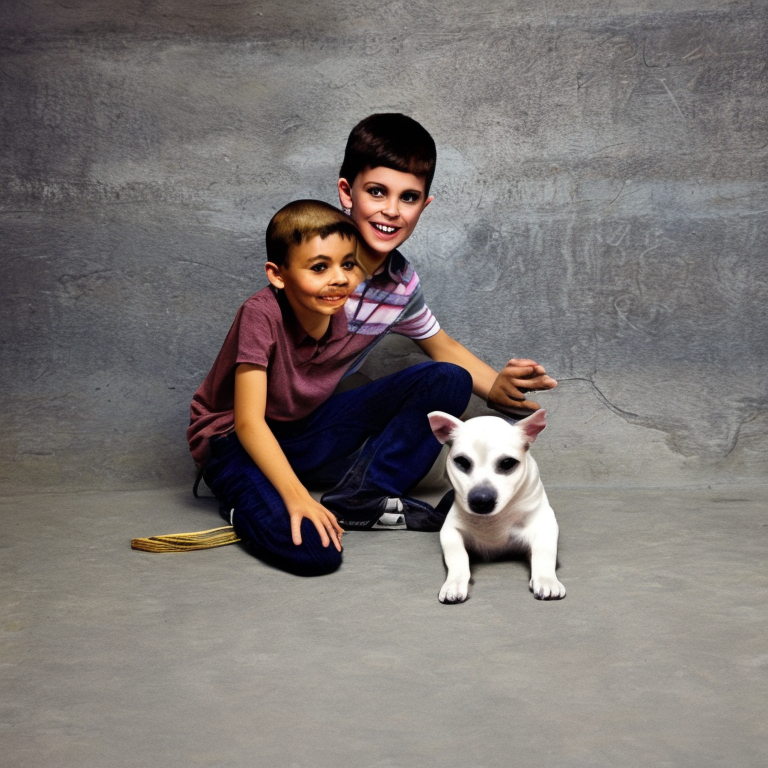

In [7]:
txt2img(prompt)

In [8]:
!pip install moralis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.7/225.7 kB 20.9 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.8.2
    Uninstalling python-dateutil-2.8.2:
      Successfully uninstalled python-dateutil-2.8.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas 1.5.3 requires python-dateutil>=2.8.1, but you have python-dateutil 2.7.5 which is incompatible.
prophet 1.1.2 requires python-dateutil>=2.8.0, but you have python-dateutil 2.

In [9]:
import base64

from moralis import evm_api

def aiart2(prompt):

  image = pipe(prompt, height=768, width=768, guidance_scale = 10).images[0]
    
  image.save("sd_image.png")

  with open("/content/sd_image.png", "rb") as img_file:
   my_string = base64.b64encode(bytes(img_file.read()))
  print(my_string.decode("utf-8"))

  

  api_key = "4y2HItroniJRNGTkwifUa40fMcjegviIZZNrHqwOihUh9j0PqUulbDR4LAXIcZD1"
  body = [{
    "path": "/content/sd_image.png", 
    "content": my_string.decode("utf-8")
  }]

  result = evm_api.ipfs.upload_folder(
    api_key=api_key,
    body=body,
  )

  print(result)

  return (image,result[-1].get("path"))

In [10]:
import gradio as gr
iface = gr.Interface(
    fn=aiart2, 
    inputs=gr.Text(label="Enter some text"), 
    outputs=[gr.Image(label="Image generated from text"), 
             gr.Text(label="IPFS link")])
 
# Launch the interface
iface.launch(share=True)







Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://2810e2cffcdd1a19c6.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
